## EDA 및 전처리

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

plt.rcParams["figure.figsize"] = (14,14)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

In [2]:
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)
print("Shape of Train data :", train_df.shape, "\n")
display(train_df.head())

print("Shape of Test data :", test_df.shape, "\n")
display(test_df.head())

Shape of Train data : (2335, 33) 



,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,4.145636,25.017645,-4.061254,0.996632,-3.837345,-13.956994,-2.042957,2.130210,-1.957662,-1.149930,6.082028,0.878612,5.093102,-6.066648,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
2,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,-4.060134,2.952843,-5.046353,1.083819,3.978378,-25.072542,-2.041602,2.912269,-3.998035,6.069698,4.966187,1.994051,-1.132059,14.906205,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
3,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,-5.975194,-23.218408,-9.000630,9.115957,12.097318,-10.954367,-3.930714,-19.069594,-6.118940,-5.001346,-9.105371,-9.894885,10.107614,4.948570,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
4,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,2.099845,-15.123774,-0.069867,-0.114247,-1.896109,5.127194,-2.877423,2.970044,-1.099702,3.116767,8.124209,-0.917418,-1.027199,14.048298,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
5,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,-4.000506,16.010442,5.961219,9.907115,-0.067754,-9.970728,0.868499,1.892233,-3.161698,-9.225990,3.953956,-17.959652,-3.115491,-6.051674,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2


Shape of Test data : (9343, 32) 



,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,0.009773,-8.048277,-23.975623,-2.938174,1.757796,3.982687,-18.094173,-0.055343,2.085911,1.885611,3.929806,7.987616,-1.047750,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
2,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,-6.921524,-3.046893,-11.052956,4.912758,16.986902,-11.192310,8.993925,-0.825023,3.969301,-19.889173,-17.971799,0.871808,-8.018209,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
3,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,0.874370,-12.870060,12.018730,-1.972370,-4.989797,7.043337,-1.141632,6.174780,3.030673,-15.931609,9.983416,-3.251407,0.981729,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
4,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,-0.019322,-26.977501,-8.132294,-1.062246,-3.028002,27.782447,3.024800,-4.103924,-4.145369,-7.963091,-7.131190,1.070134,1.999624,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
5,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,-8.831718,-39.009595,26.919958,-8.052420,13.759281,-18.026002,1.073389,49.029965,-4.794785,37.975778,-1.941377,-21.816534,-7.096878,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


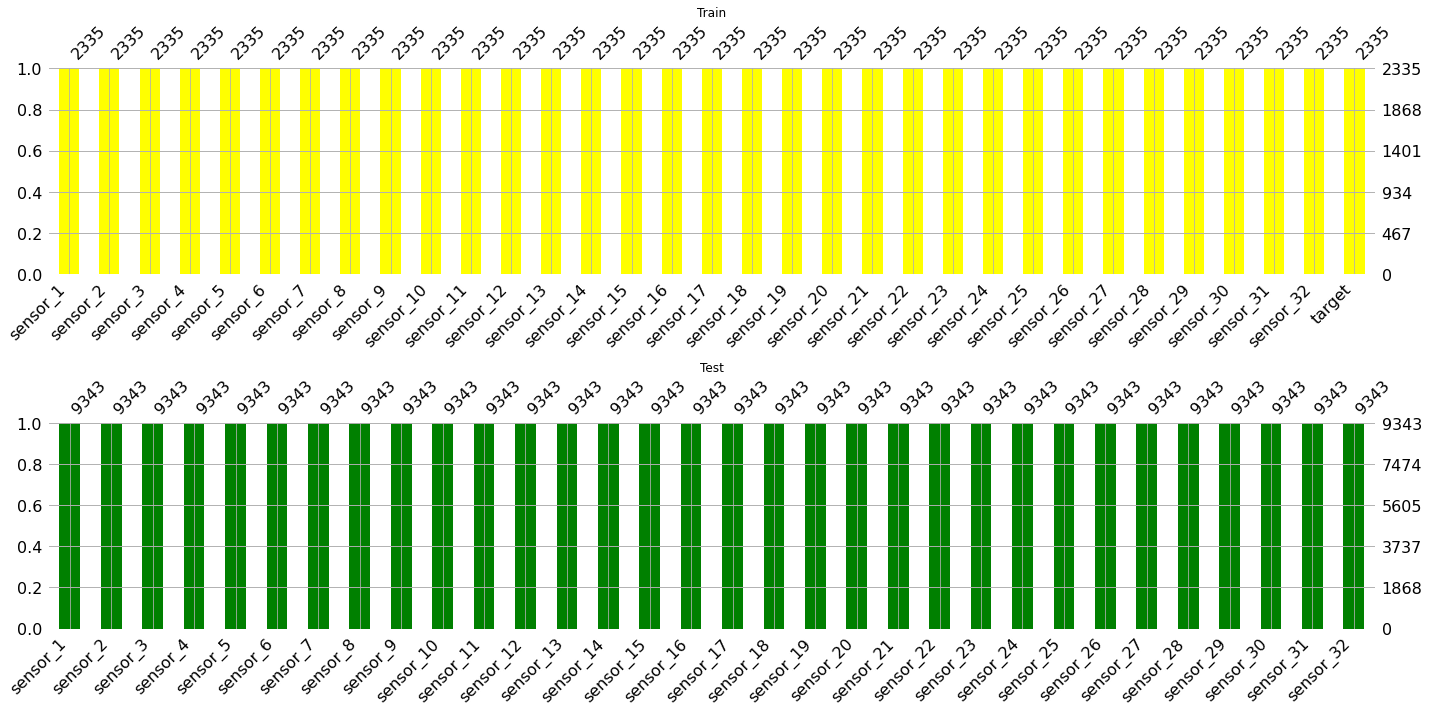

In [3]:
fig, axes = plt.subplots(nrows = 2, figsize=(20,10))

msno.bar(train_df, color = 'yellow', ax = axes[0])
axes[0].set_title('Train')

msno.bar(test_df, color='green',ax=axes[1])
axes[1].set_title("Test")

fig.tight_layout()

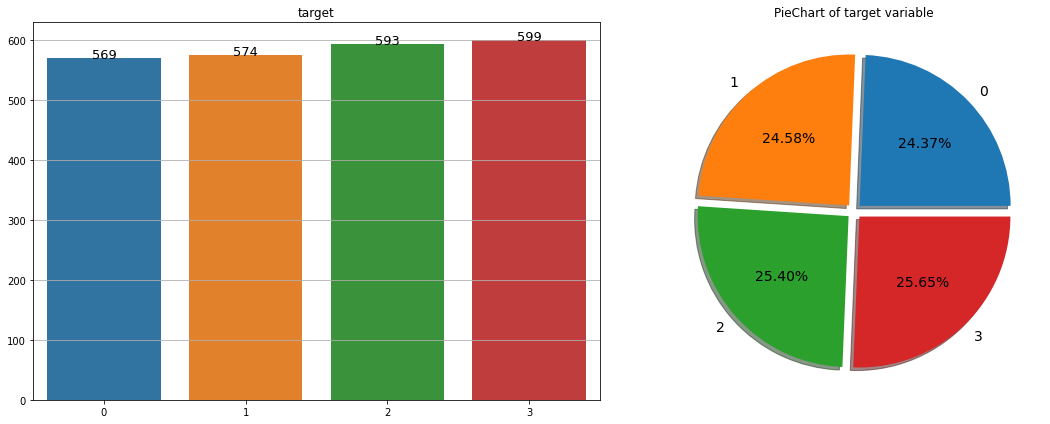

In [4]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

sns.countplot(x = "target", data = train_df, ax = axes[0])
axes[0].set_title("target")

for rect in axes[0].patches:
    axes[0].text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), ha = "center", fontsize = 13)

plot_data = train_df["target"].value_counts().sort_index()
plot_data.plot.pie(explode = [0.05, 0.05, 0.05, 0.05], shadow = True, autopct = "%.2f%%", fontsize = 14)
axes[1].set_title("PieChart of target variable")
for index in [0, 1]:
    axes[index].set_xlabel("")
    axes[index].set_ylabel("")

fig.tight_layout()


In [5]:
train_df.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,-1.122174,-1.024673,-0.672769,-0.147724,-0.327494,-0.423462,0.676275,-0.936019,-0.797432,-0.704585,-1.099322,-0.843473,-0.491915,-0.851473,-0.344029,-1.128676,-0.959658,-0.639778,-0.559455,-0.658692,-0.611461,-0.741168,0.027448,-0.356441,-0.927744,-0.589060,-0.081374,-0.370812,-0.726941,-0.809534,-0.495062,-0.743585,1.523340
std,11.486353,7.399859,26.519159,15.551500,11.461970,7.314322,26.869479,15.598104,12.015022,7.384626,26.262009,15.498328,11.894939,7.401702,25.815937,15.513633,11.654236,7.586333,26.885734,15.936823,11.942224,7.548507,26.671928,16.531906,12.021560,7.440983,25.923355,15.541803,11.636507,7.469744,25.291238,16.300385,1.118221
min,-94.746969,-63.942094,-122.195138,-111.870691,-94.147972,-70.916786,-105.956553,-102.965354,-81.268085,-47.937561,-115.943693,-102.916207,-115.053373,-59.689434,-107.985386,-126.950747,-95.956853,-83.854213,-108.964270,-108.094304,-103.876936,-59.993001,-93.171275,-127.797649,-99.115177,-86.193378,-105.751637,-105.890010,-74.977182,-74.006065,-121.097086,-123.876153,0.000000
25%,-4.036597,-4.031957,-14.878500,-7.116633,-3.968687,-3.957699,-13.937806,-8.053214,-4.031148,-3.983620,-15.165419,-8.082508,-3.893967,-3.982224,-14.953749,-8.096568,-4.038010,-3.996916,-15.179515,-7.851749,-4.002134,-3.973502,-14.102903,-7.980628,-4.004750,-4.001112,-14.096840,-8.004561,-3.981055,-3.988965,-13.998874,-7.873898,1.000000
50%,-0.951398,-1.015582,-0.961088,-0.890469,-0.871690,-0.804810,0.058910,-1.095551,-0.944613,-0.932964,-1.116522,-1.054003,-0.908079,-0.937905,-0.858820,-1.004242,-0.947597,-0.967231,-0.964579,-1.013369,-0.942706,-0.968065,-1.104314,-0.926120,-0.907301,-0.897015,-0.954791,-0.989293,-0.889780,-0.928504,-0.955684,-1.019547,2.000000
75%,2.895540,2.140456,13.974075,6.110973,2.970387,3.006144,13.934438,4.955494,2.235557,2.883284,13.022905,6.021600,2.992981,2.854699,12.965905,5.508252,2.895085,2.876743,13.978336,5.917309,2.948692,2.920789,12.137937,6.002985,2.863184,2.951682,13.903783,5.922250,2.972719,2.519426,13.926128,5.121679,3.000000
max,68.876142,39.913391,127.124171,102.015561,89.059852,34.923040,120.046277,125.160611,74.101715,47.030119,127.110419,99.932331,107.910041,40.026878,126.981907,120.974880,85.952050,39.993408,117.934200,121.026042,102.882569,40.917741,121.959404,127.161055,58.113657,59.105536,123.179253,111.137925,54.098746,35.896503,125.974107,104.959621,3.000000


In [6]:
test_df.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
count,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000
mean,-0.628258,-0.656799,-0.525379,-0.790890,-0.734214,-0.801868,-0.382038,-0.808731,-0.605111,-0.740536,0.027124,-0.540943,-0.776290,-0.635792,-0.433570,-0.749601,-0.714818,-0.658445,-0.111501,-0.839346,-0.899049,-0.623447,-0.638059,-0.763211,-0.790750,-0.755255,-0.437697,-1.071997,-0.743311,-0.678331,-0.344835,-0.576254
std,11.832964,7.452133,25.631510,15.372176,11.933031,7.390419,25.755418,15.330627,11.902088,7.396929,25.549750,14.875152,11.978860,7.295009,26.199882,15.461319,12.268331,7.266772,26.213708,15.261372,12.203308,7.296026,26.038906,15.235777,11.946456,7.344751,25.936114,15.060080,12.097549,7.363458,25.618149,15.332268
min,-104.044027,-75.059695,-114.018432,-127.943995,-127.983210,-84.030386,-128.033637,-128.036004,-109.116907,-99.014745,-119.891322,-117.967624,-99.120018,-94.968659,-128.199543,-127.970392,-112.103291,-84.957935,-127.996994,-127.933887,-120.099697,-79.099258,-123.101594,-127.893767,-119.994449,-69.954064,-128.013570,-128.067795,-128.032877,-68.973719,-127.952703,-107.960724
25%,-3.979736,-3.966381,-14.974971,-7.969307,-3.971995,-3.978190,-14.104783,-8.007179,-4.001779,-4.012557,-14.001859,-7.899624,-3.993974,-3.975414,-14.966070,-7.959364,-4.010047,-3.970846,-14.137434,-8.000989,-4.018006,-3.976943,-15.035832,-7.982726,-3.995787,-3.994754,-14.850654,-8.017426,-3.982730,-3.988324,-14.005003,-7.834823
50%,-0.904598,-0.887505,-1.021169,-1.033398,-0.903961,-0.944097,-0.889134,-1.100708,-0.909196,-0.924022,-0.187238,-0.981945,-0.894447,-0.900616,-1.032946,-1.047852,-0.920913,-0.920273,-0.875067,-1.063311,-0.946501,-0.900535,-1.022250,-1.024196,-0.908620,-0.916166,-1.012729,-1.045174,-0.919393,-0.935407,-0.913188,-1.004701
75%,2.987203,2.935523,13.019911,5.852302,2.966576,2.833633,13.188271,5.118780,2.946251,2.950737,13.796687,5.930816,2.923612,2.947260,13.073840,5.858131,2.921878,2.922913,13.188760,5.198581,2.921507,2.956603,13.038944,5.214487,2.911339,2.888456,13.814711,5.172807,2.942584,2.862274,13.010044,5.942596
max,90.037923,54.977145,126.805849,126.130615,106.023697,61.102433,127.202233,126.957325,118.063610,38.874365,127.093476,108.129028,122.980740,44.035605,127.034984,126.983316,102.021476,55.890417,126.927507,127.050356,106.047582,54.009478,127.139450,126.935040,110.988863,76.122970,126.826318,114.034898,105.070831,51.066778,127.040313,126.967283


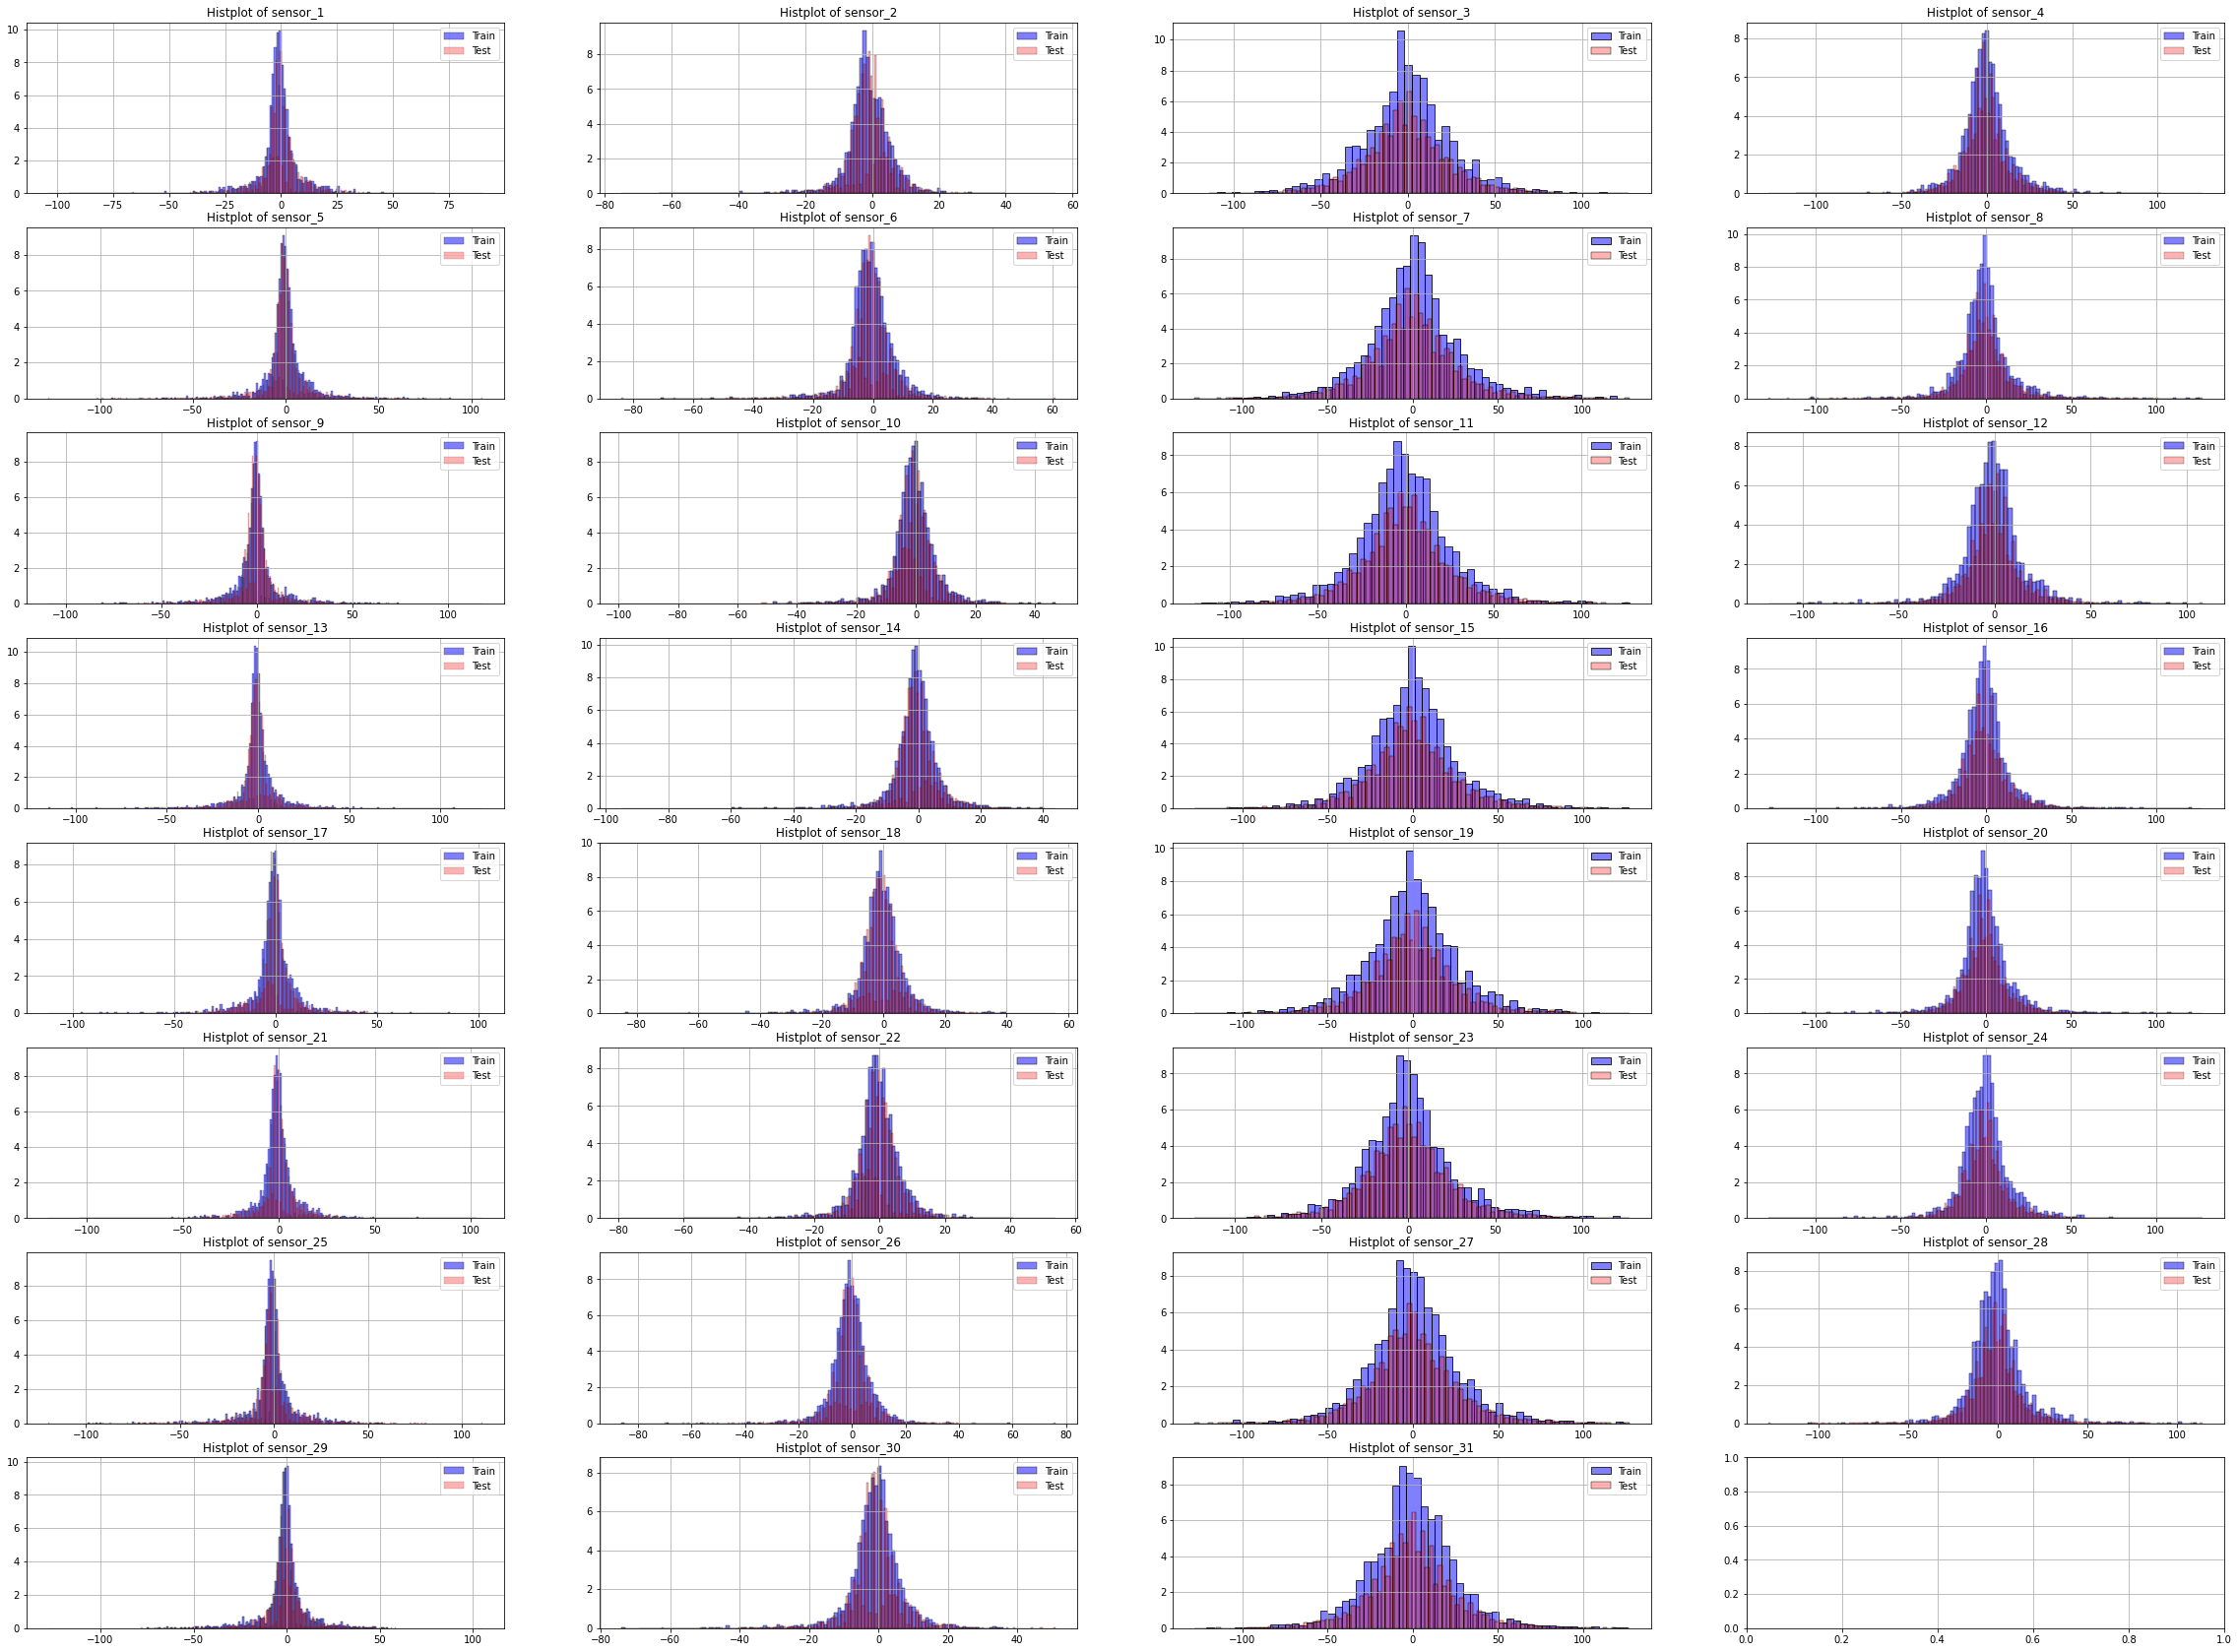

In [7]:
# percent = sum은 막대들의 높이의 합이 100이 되도록 하는 것
fit, axes = plt.subplots(nrows = 8, ncols = 4, figsize = (40, 30))

column_list = train_df.columns[:-2]

for index, column in enumerate(column_list):
    
    row = index // 4
    col = index % 4
    
    # Train data
    sns.histplot(x = column, data = train_df, stat = "percent", color = "blue", alpha = 0.5, label = "Train", ax = axes[row][col])
    
    # Test data
    sns.histplot(x = column, data = test_df, stat = "percent", color = "red", alpha = 0.3, label = "Test", ax = axes[row][col])
    
    axes[row][col].set_title("Histplot of {}".format(column))
    axes[row][col].set_xlabel("")
    axes[row][col].set_ylabel("")
    axes[row][col].legend()
    
fig.tight_layout(pad = 1.5)

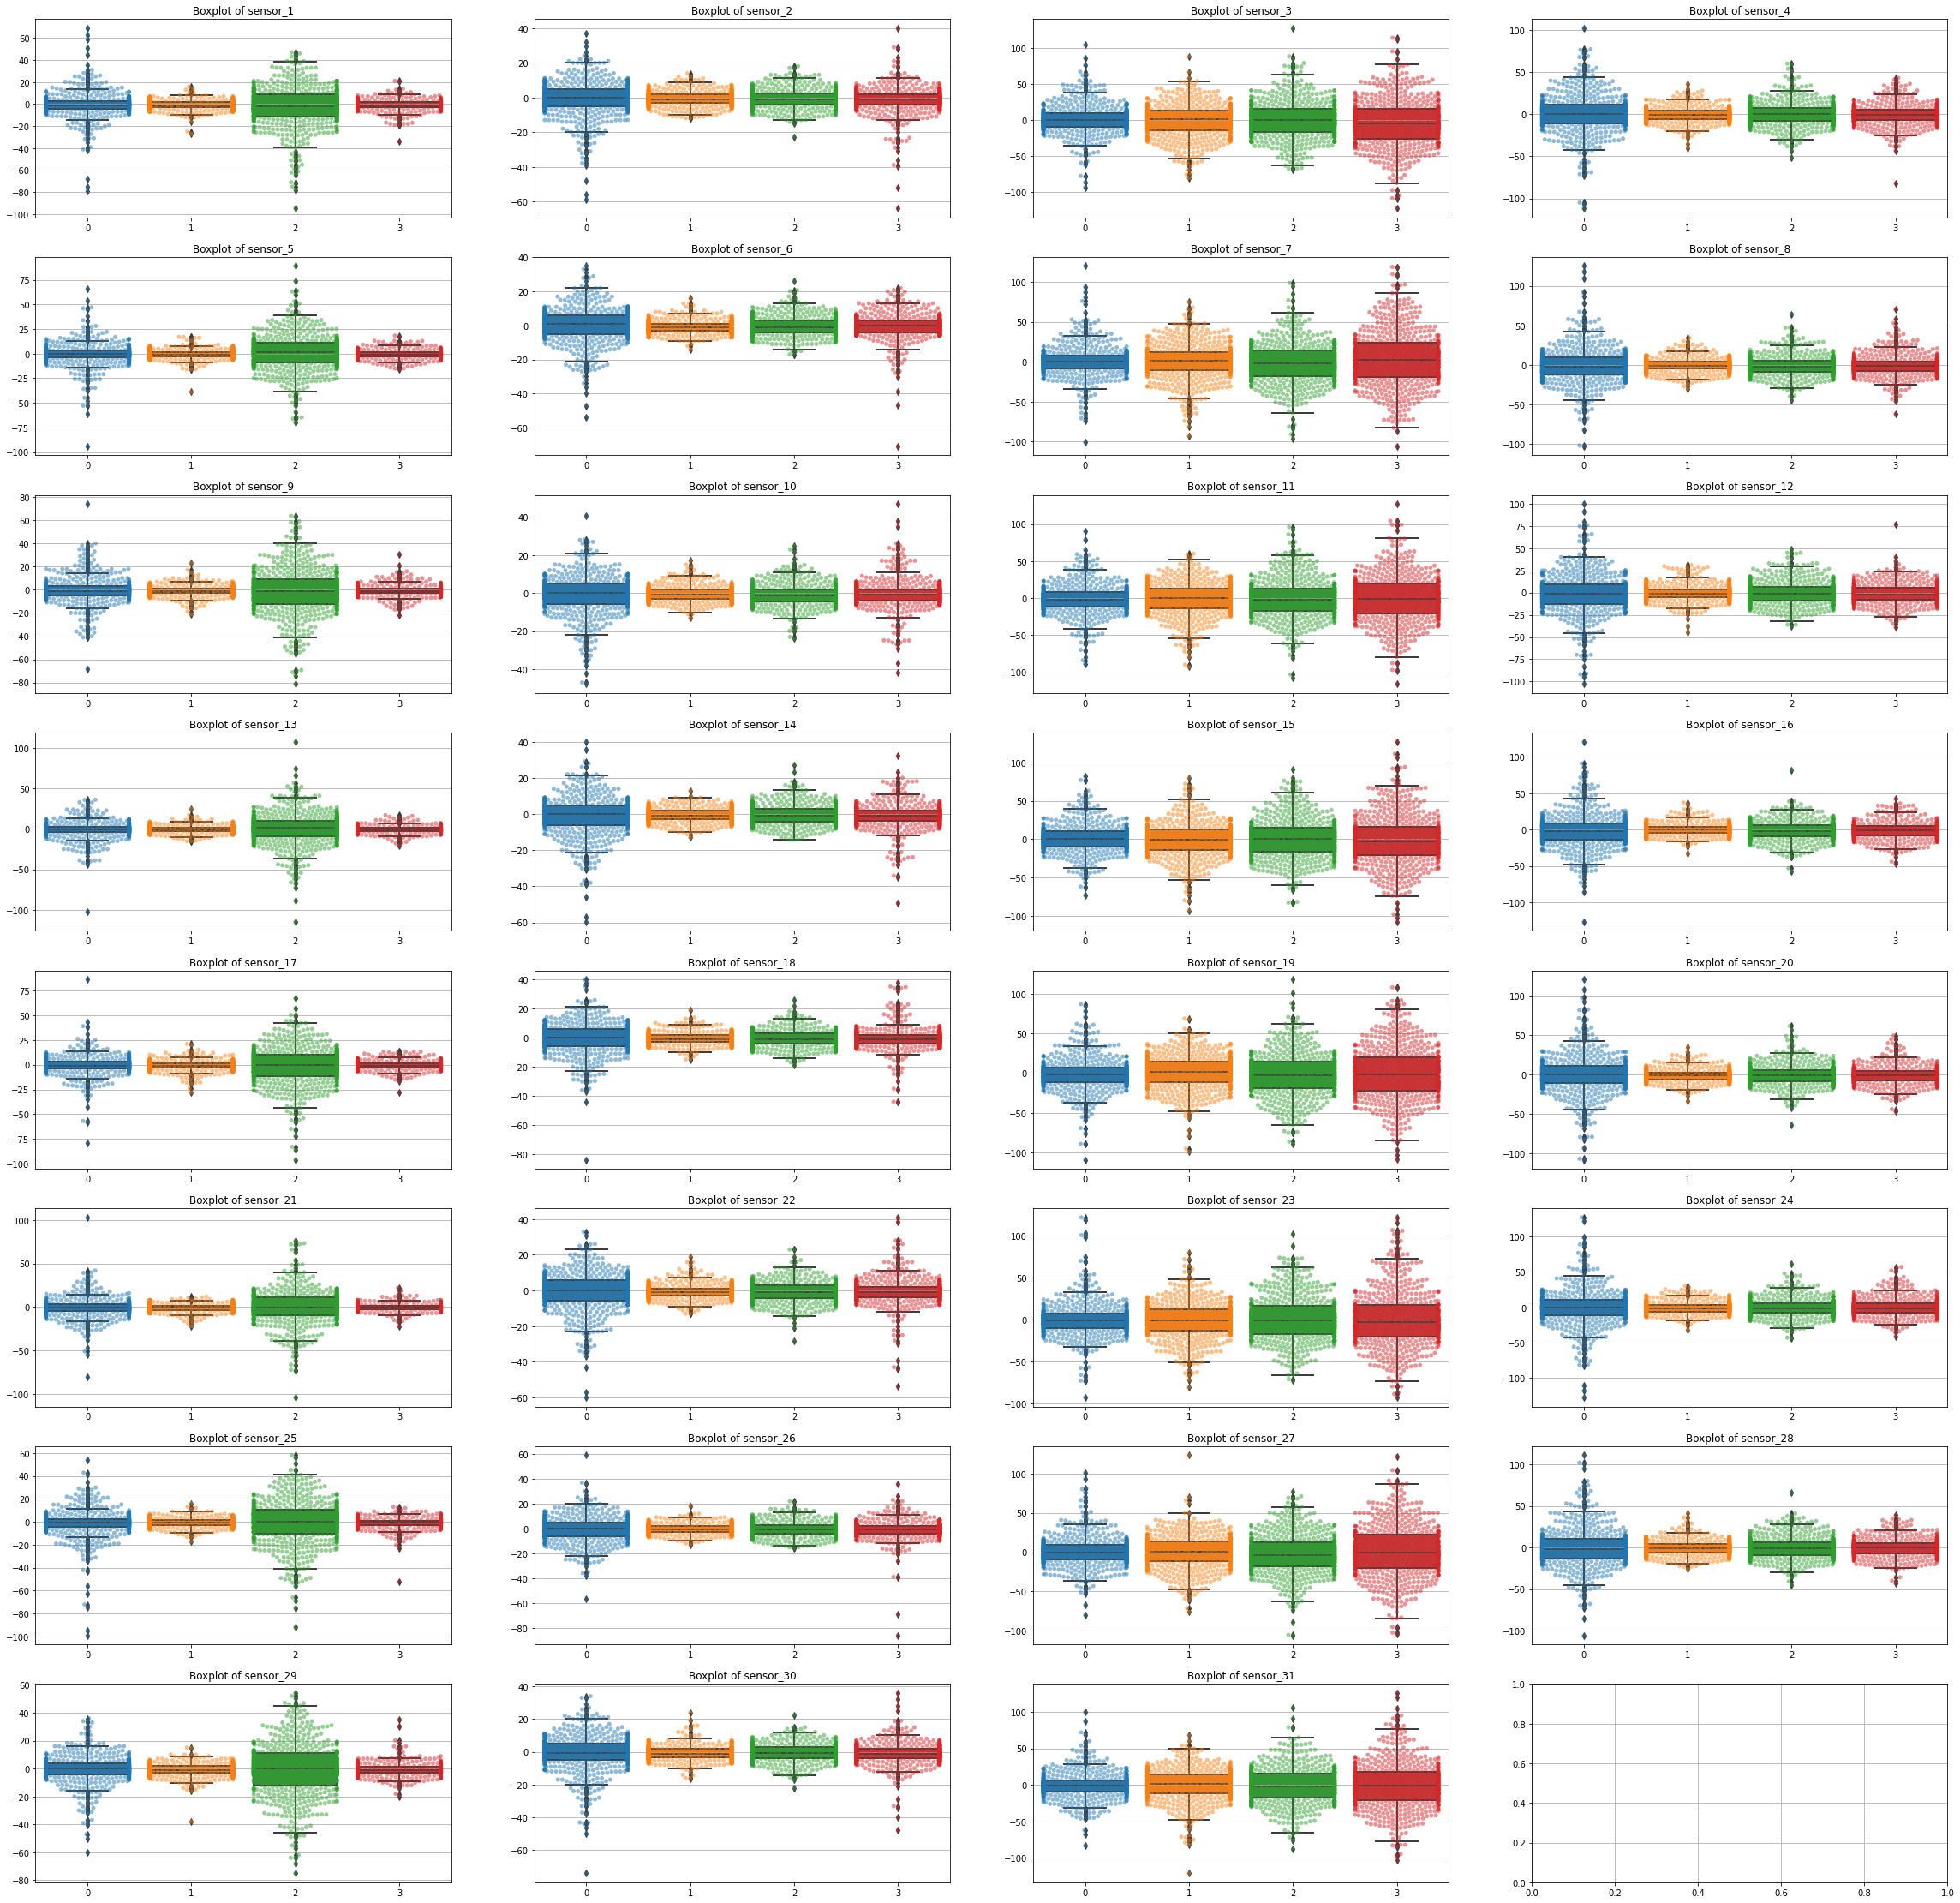

In [8]:
# 클래스 별로 이상치를 살펴보았다.
fit, axes = plt.subplots(nrows = 8, ncols = 4, figsize = (40, 40))

column_list = train_df.columns[:-2]

for index, column in enumerate(column_list):
    
    row = index // 4
    col = index % 4
    
    sns.boxplot(x = "target", y = column, data = train_df, ax = axes[row][col])
    sns.swarmplot(x = "target", y = column, alpha = 0.5, data = train_df, ax = axes[row][col])
    
    axes[row][col].set_title("Boxplot of {}".format(column))
    axes[row][col].set_xlabel("")
    axes[row][col].set_ylabel("")
    
fig.tight_layout(pad = 1.5)

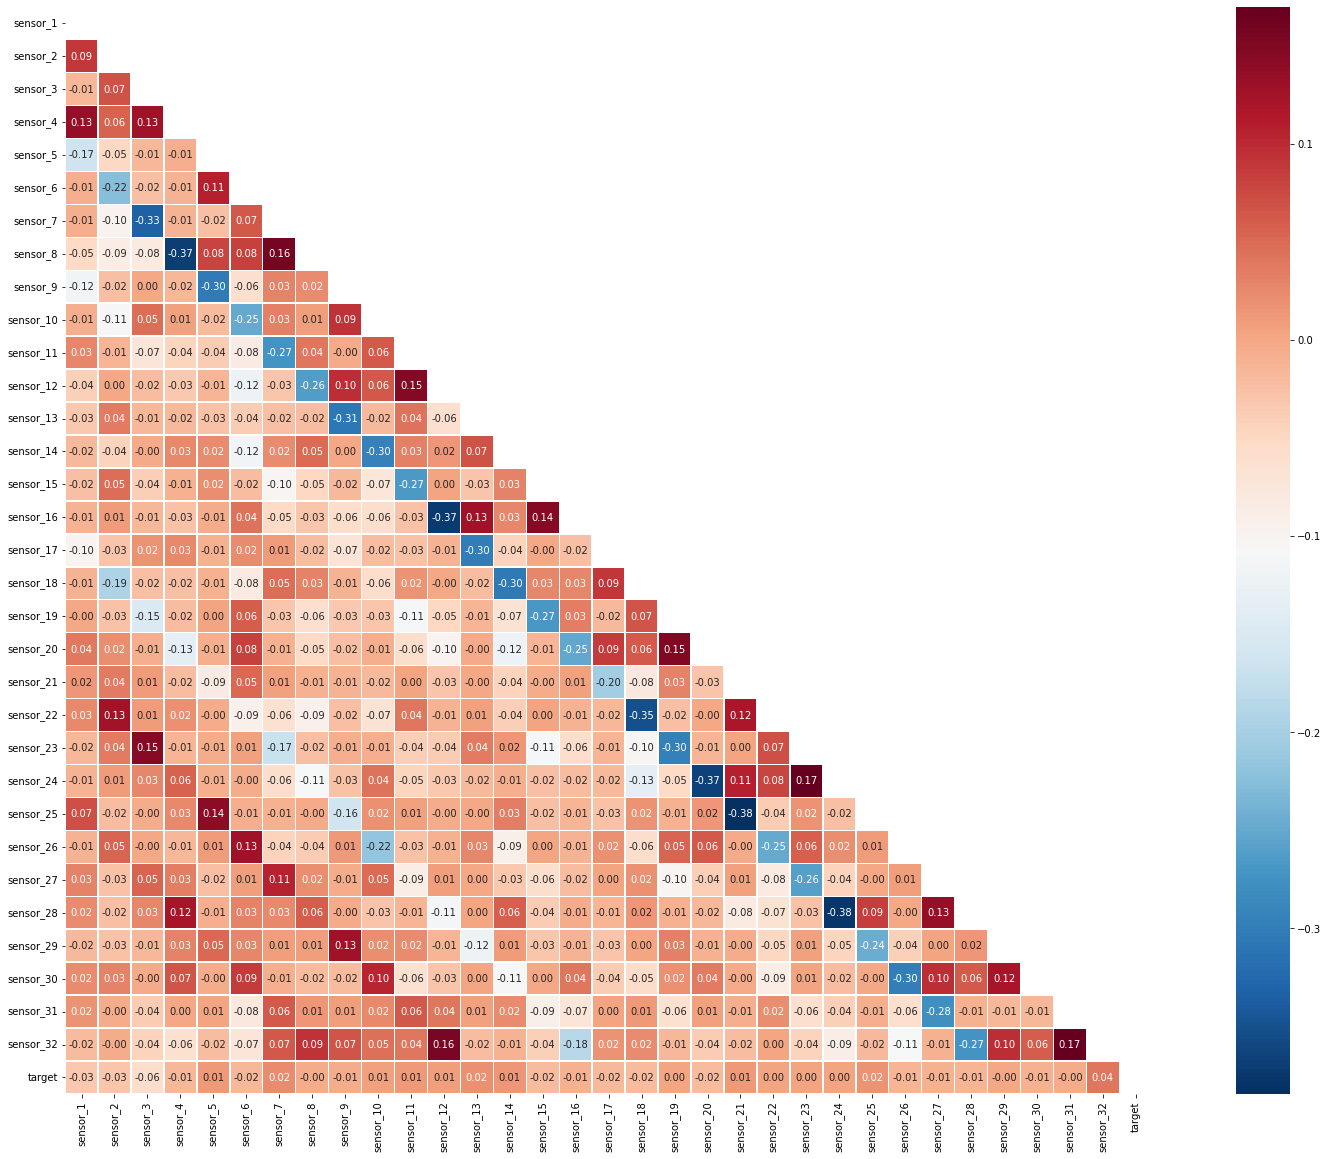

In [9]:
corr_data = train_df.corr()

# 히트맵 옵션 설정
mask = np.zeros_like(corr_data, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (30, 20))

sns.heatmap(corr_data, mask = mask, annot = True, fmt = ".2f", linewidth = 0.5, square = True, cmap = "RdBu_r")
plt.show()

#### 스케일링

In [56]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

train_df.iloc[:,:-1] = scaler.fit_transform(train_df.iloc[:,:-1])
train_df.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.541473,0.606731,0.526447,0.490227,0.497738,0.671732,0.464596,0.447091,0.561398,0.548431,0.579959,0.487334,0.520489,0.560110,0.400177,0.503812,0.539210,0.661269,0.475166,0.498325,0.506654,0.644987,0.404892,0.473689,0.592187,0.551880,0.492702,0.588748,0.557137,0.625632,0.465740,0.488933,1
2,0.565373,0.606021,0.510563,0.472168,0.509495,0.641768,0.588175,0.412336,0.484649,0.462025,0.489177,0.482477,0.520880,0.638489,0.352870,0.503817,0.543509,0.644794,0.506984,0.493455,0.512049,0.583297,0.502381,0.493417,0.579928,0.571626,0.500264,0.538340,0.657252,0.664560,0.474202,0.471883,1
3,0.695714,0.595535,0.493912,0.420966,0.563662,0.838724,0.375600,0.381509,0.465033,0.441859,0.381501,0.462984,0.556905,0.719910,0.412955,0.496197,0.422669,0.627669,0.458191,0.432039,0.454548,0.694679,0.456094,0.474226,0.974169,0.551168,0.515030,0.515998,0.269470,0.637364,0.457429,0.518783,0
4,0.565540,0.597091,0.577908,0.508696,0.512573,0.698242,0.340187,0.452233,0.516345,0.526889,0.414804,0.507011,0.515507,0.579577,0.481397,0.500446,0.543827,0.668196,0.493970,0.507238,0.497968,0.584336,0.498393,0.492909,0.623802,0.608209,0.505761,0.483252,0.550562,0.646261,0.437580,0.528218,1
5,0.603221,0.644232,0.345542,0.527245,0.660879,0.774011,0.371651,0.398969,0.388327,0.462653,0.542900,0.536742,0.560453,0.597913,0.417142,0.515555,0.537902,0.651547,0.439572,0.489037,0.415542,0.563642,0.404961,0.493201,0.699825,0.606327,0.405131,0.567022,0.597186,0.709483,0.538139,0.422955,2


In [57]:
test_df = scaler.transform(test_df)

## 딥러닝 모델

In [58]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [59]:
tf.random.set_seed(42)
np.random.seed(42)

#### MLP

In [81]:
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
X_test = test_df

In [82]:
y_train = tf.keras.utils.to_categorical(y_train,4)

In [83]:
mlp = Sequential()
mlp.add(Dense(1000, input_dim=32, activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(200, activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(40, activation='relu'))
mlp.add(Dense(4, activation='softmax'))
mlp.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1000)              33000     
                                                                 
 dropout_12 (Dropout)        (None, 1000)              0         
                                                                 
 dense_29 (Dense)            (None, 200)               200200    
                                                                 
 dropout_13 (Dropout)        (None, 200)               0         
                                                                 
 dense_30 (Dense)            (None, 40)                8040      
                                                                 
 dense_31 (Dense)            (None, 4)                 164       
                                                                 
Total params: 241,404
Trainable params: 241,404
Non-tr

In [84]:
mc = ModelCheckpoint('mlp_best.h5', save_best_only = True, monitor = 'val_accuracy', verbose = 0)

mlp.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history1 = mlp.fit(X_train, y_train, epochs = 300, batch_size = 32, callbacks = [mc], validation_split=0.2, verbose = 0)

In [85]:
def plt_show_loss(history):
  plt.figure(figsize=(10,10))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Model Loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend(['train', 'test'], loc=0)

In [86]:
def plt_show_acc(history):
  plt.figure(figsize=(10,10))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Model accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['train', 'test'], loc=0)

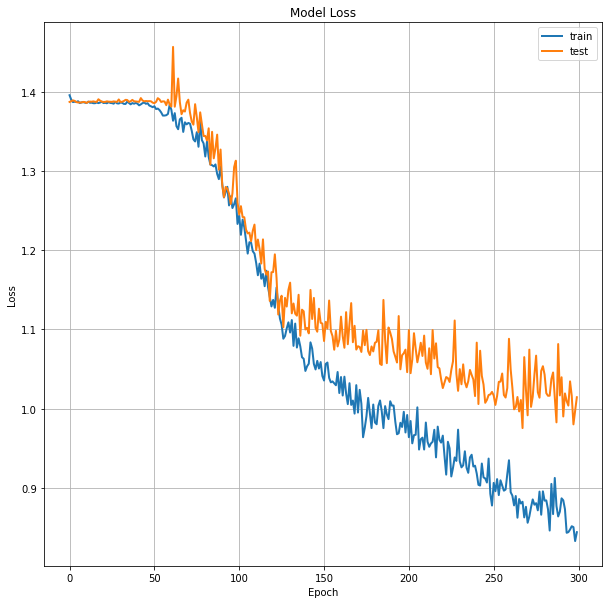

In [87]:
plt_show_loss(history1)

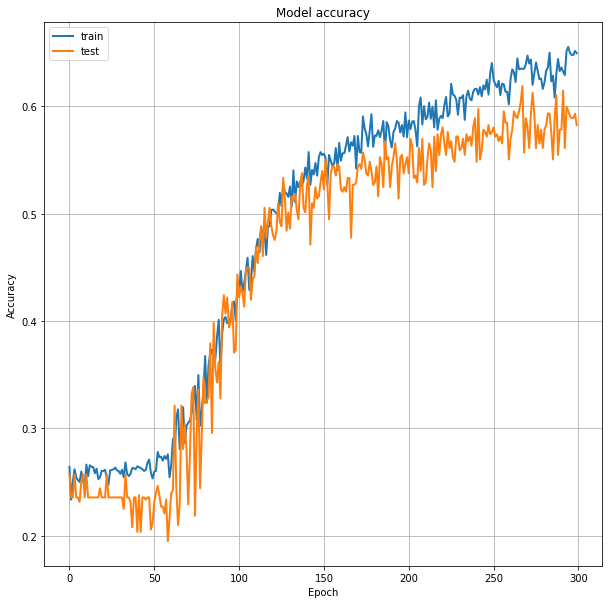

In [88]:
plt_show_acc(history1)
plt.show()

#### RNN

In [89]:
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
X_test = test_df

In [90]:
y_train = tf.keras.utils.to_categorical(y_train,4)

In [91]:
X_train = np.array(X_train).reshape(-1,4,8)
X_test = np.array(X_test).reshape(-1,4,8)

In [92]:
RNN = Sequential()
RNN.add(SimpleRNN(400, activation='relu', input_shape=(4,8)))
RNN.add(Dropout(0.2))
RNN.add(Dense(100, activation='relu'))
RNN.add(Dense(50, activation='relu'))
RNN.add(Dense(4, activation='softmax'))

In [93]:
es = EarlyStopping(monitor = 'val_accuracy', patience = 15, verbose = 0)
mc = ModelCheckpoint('rnn_best.h5', save_best_only = True, monitor = 'val_accuracy', verbose = 0)

RNN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history2 = RNN.fit(X_train, y_train, epochs = 100, batch_size = 32, callbacks = [es, mc], validation_split=0.2, verbose = 0)

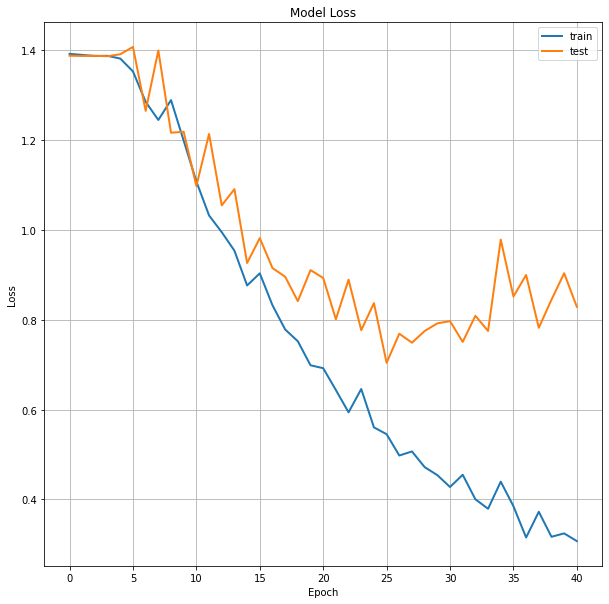

In [94]:
plt_show_loss(history2)
plt.show()

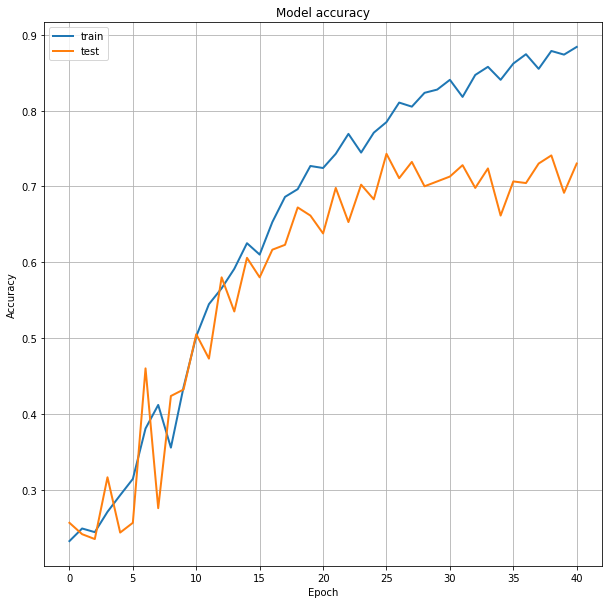

In [95]:
plt_show_acc(history2)
plt.show()

#### LSTM

In [96]:
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
X_test = test_df

In [97]:
y_train = tf.keras.utils.to_categorical(y_train,4)

In [98]:
X_train = np.array(X_train).reshape(-1,4,8)
X_test = np.array(X_test).reshape(-1,4,8)

In [99]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(1000, activation='relu', input_shape=(4,8)))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(100, activation='relu'))
LSTM_model.add(Dense(50, activation='relu'))
LSTM_model.add(Dense(4, activation='softmax'))

In [100]:
LSTM_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1000)              4036000   
                                                                 
 dropout_15 (Dropout)        (None, 1000)              0         
                                                                 
 dense_35 (Dense)            (None, 100)               100100    
                                                                 
 dense_36 (Dense)            (None, 50)                5050      
                                                                 
 dense_37 (Dense)            (None, 4)                 204       
                                                                 
Total params: 4,141,354
Trainable params: 4,141,354
Non-trainable params: 0
_________________________________________________________________


In [101]:
es = EarlyStopping(monitor = 'val_accuracy', patience = 15, verbose = 0)
mc = ModelCheckpoint('lstm_best.h5', save_best_only = True, monitor = 'val_accuracy', verbose = 0)

LSTM_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history3 = LSTM_model.fit(X_train, y_train, epochs = 100, batch_size = 32, callbacks = [es, mc], validation_split=0.2, verbose = 0)

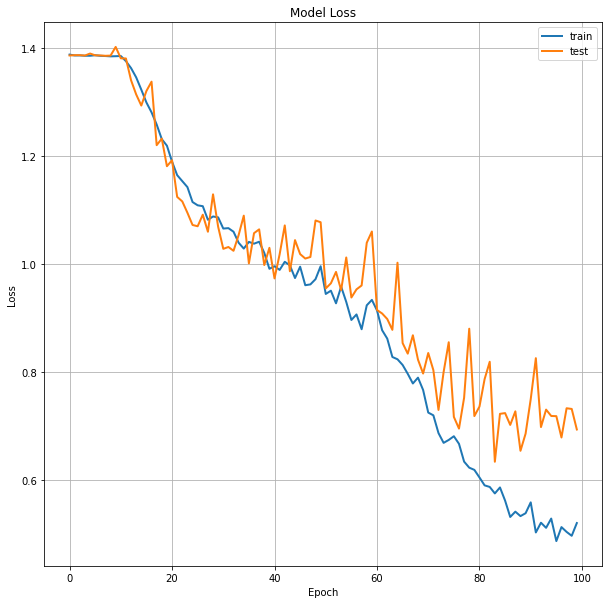

In [102]:
plt_show_loss(history3)
plt.show()

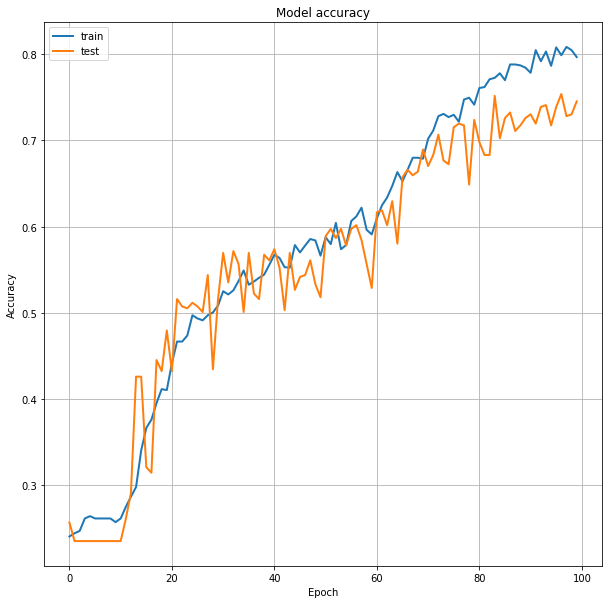

In [103]:
plt_show_acc(history3)
plt.show()

In [104]:
# CNN보다 성능이 좋은 모델은 없는 것 같아 제출파일을 따로 생성하지 않았습니다.